In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:

from calcTI import *

In [4]:
# importing raw data
raw_df = pd.read_csv(r'..\\raw_data_30M\\currency_pairs\\GBPJPY_M30.csv', sep='\t')

In [5]:
raw_df = raw_df[-100000:]
raw_df.reset_index(inplace=True)
raw_df = raw_df.drop(['index', 'Time'], axis=1)

In [6]:
raw_df = ema_n(raw_df, 200)
raw_df = ema_n(raw_df, 100)

In [8]:
raw_df = vwap(raw_df)

In [9]:
raw_df

,Open,High,Low,Close,Volume,EMA_200,EMA_100,VWAP
0,177.783,177.988,177.743,177.983,3148,177.983,177.983,177.905
1,177.983,178.113,177.802,177.847,3861,177.982,177.980,177.913
2,177.845,177.982,177.732,177.841,3443,177.980,177.978,177.893
3,177.844,178.021,177.799,178.005,2756,177.980,177.978,177.903
4,177.996,178.272,177.947,178.243,2596,177.983,177.983,177.969
...,...,...,...,...,...,...,...,...
99995,158.498,158.626,158.465,158.555,2379,158.762,158.763,158.484
99996,158.553,158.590,158.478,158.484,2185,158.759,158.758,158.517
99997,158.480,158.527,158.412,158.450,2411,158.756,158.752,158.509
99998,158.449,158.462,158.370,158.426,1599,158.753,158.745,158.471


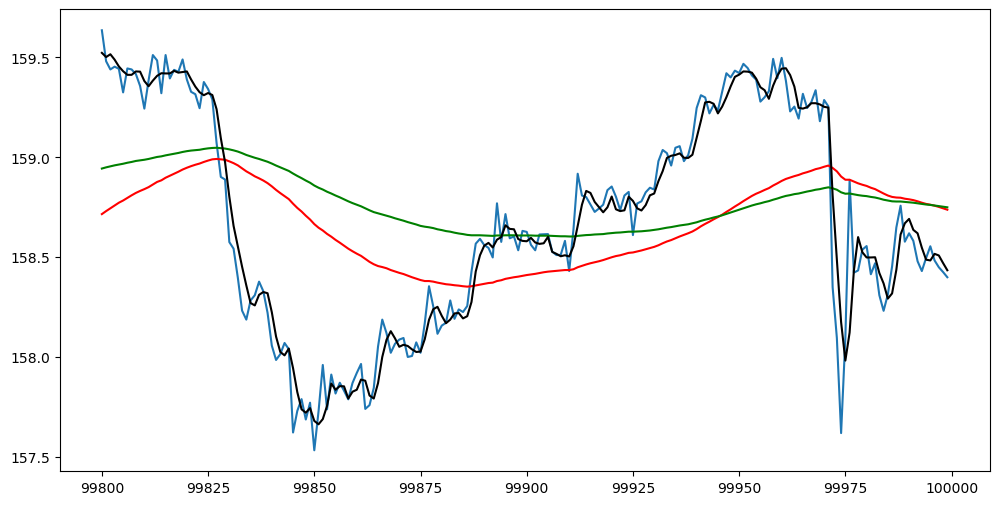

In [13]:
dx = raw_df[-200:]
plt.figure(figsize=(12,6))
plt.plot(dx.Close)
plt.plot(dx.EMA_100, 'red')
plt.plot(dx.EMA_200, 'green')
plt.plot(dx.VWAP, 'black')


In [17]:
# Defining what an uptrend or downtrend is
raw_df['Trend'] = [1 if (row['Close'] > row['EMA_200'] + 0.00075 * row['Close']) and (row['Close'] > row['EMA_100'] + 0.001 * row['Close']) and (row['Close'] > row['EMA_100'] + 0.00125 * row['Close'])
                        else -1 if row['Close'] < row['EMA_200'] - 0.00075 * row['Close'] and (row['Close'] < row['EMA_100'] + 0.001 * row['Close']) and (row['Close'] < row['EMA_100'] + 0.00125 * row['Close'])
                        else 0 
                        for index, row in raw_df.iterrows()]


In [18]:
raw_df

,Open,High,Low,Close,Volume,EMA_200,EMA_100,VWAP,Trend
0,177.783,177.988,177.743,177.983,3148,177.983,177.983,177.905,0
1,177.983,178.113,177.802,177.847,3861,177.982,177.980,177.913,-1
2,177.845,177.982,177.732,177.841,3443,177.980,177.978,177.893,-1
3,177.844,178.021,177.799,178.005,2756,177.980,177.978,177.903,0
4,177.996,178.272,177.947,178.243,2596,177.983,177.983,177.969,1
...,...,...,...,...,...,...,...,...,...
99995,158.498,158.626,158.465,158.555,2379,158.762,158.763,158.484,-1
99996,158.553,158.590,158.478,158.484,2185,158.759,158.758,158.517,-1
99997,158.480,158.527,158.412,158.450,2411,158.756,158.752,158.509,-1
99998,158.449,158.462,158.370,158.426,1599,158.753,158.745,158.471,-1


In [20]:
raw_df.to_csv('..\\pre_processed_data\\bot_df\\GBPJPY_M30.csv')

In [22]:
final_df = raw_df.drop(['Open', 'High', 'Low', 'Volume'], axis=1)

In [24]:
final_df.to_csv('..\\final_data\\bot_df\\GBPJPY_M30.csv')

In [ ]:
final_df = pd.read_csv('..\\pre_processed_data\\200_ema\\GBPJPY_M30.csv')

In [ ]:
final_df = final_df.drop('Unnamed: 0', axis=1)

In [27]:
final_df

,Close,EMA_200,EMA_100,VWAP,Trend
0,177.983,177.983,177.983,177.905,0
1,177.847,177.982,177.980,177.913,-1
2,177.841,177.980,177.978,177.893,-1
3,178.005,177.980,177.978,177.903,0
4,178.243,177.983,177.983,177.969,1
...,...,...,...,...,...
99995,158.555,158.762,158.763,158.484,-1
99996,158.484,158.759,158.758,158.517,-1
99997,158.450,158.756,158.752,158.509,-1
99998,158.426,158.753,158.745,158.471,-1


In [25]:
final_df.dtypes

Close      float64
EMA_200    float64
EMA_100    float64
VWAP       float64
Trend        int64
dtype: object

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [28]:
x0=[]
x1=[]
x2=[]
x3=[]
y=[]

In [29]:
for i in range (0, final_df.shape[0] - 200):
    x0.append(final_df.iloc[i:i+200, 0])
    x1.append(final_df.iloc[i:i+200, 1])
    x2.append(final_df.iloc[i:i+200, 2])
    x3.append(final_df.iloc[i:i+200, 3])
    y.append(final_df.iloc[i+200, 4])
# maybe also try with 400 or 2000 instead of 200

In [31]:
x0, x1, x2, x3, y = np.array(x0), np.array(x1), np.array(x2), np.array(x3), np.array(y)

In [33]:
y=np.reshape(y, (len(y), 1))

In [35]:
x0 = scaler.fit_transform(x0)
x1 = scaler.fit_transform(x1)
x2 = scaler.fit_transform(x2)
x3 = scaler.fit_transform(x3)

In [37]:
X = np.stack([x0, x1, x2, x3], axis=2)

In [38]:
X.shape

(99800, 200, 4)